In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [2]:
from NBprocessing import NBcategorical
from NBprocessing import NBcontinuous
from NBprocessing import NBplot
from NBprocessing import NBgeneral

In [3]:
data_dict = pd.read_excel('20-08-14_EPA_Data_Dictionnary_Campstat.xlsx')
data_dict.rename(columns={data_dict.columns[0]: 'feature', data_dict.columns[1]:'definition'}, inplace=True)
data_dict = data_dict.iloc[1:, :]

# Loading data dictionary

In [4]:
pd.set_option('display.max_colwidth', 0)

data_dict

,feature,definition
1,idstay,Internal ID for each booking
2,idstay_to,External ID for a booking coming from a distributor
3,type_stay_lbl,INDIV RESID : stock from a Unit belowing to a owner - INDIV ALLOT : stock from a distributor allotment - INDIV DIRECT : stock directly managed by the campsite
4,resinternet,Internal ID for each booking. Beginning with U means a booking made by phone or on site by the campsite. Beginning with O means a Internet Booking
5,type_guest,Not very use : A = Allotment - N = Individual customer
6,extract_date,Date of the last export (ie creation/modification) of the booking from the PMS. System Date
7,resdate,Date of the booking
8,camping_code,Internal ID for each campsite
9,camping_label,Name of the campsite
10,Région,Region of the Campsite


In [5]:
from pyxlsb import open_workbook as open_xlsb

In [6]:
df = []

with open_xlsb('19-01-04_Séjours_2018.xlsb') as wb:
    with wb.get_sheet(1) as sheet:
        for row in sheet.rows():
            df.append([item.v for item in row])

df = pd.DataFrame(df[1:], columns=df[0])

In [7]:
df.head()

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,...,region,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl
0,320-14150,None,INDIV DIRECT,U20130628DEBUR932214355,N,43220.0,43040.0,59.0,TURISCAMPO,Portugal,...,7322,Y,42005.0,100.0,41212.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined
1,320-19097,None,INDIV DIRECT,U20131119GRIME393582153,N,43136.0,42675.0,59.0,TURISCAMPO,Portugal,...,PO381NX,Y,41275.0,59.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
2,320-20471,None,INDIV DIRECT,U20140228HINDL599191284,N,43327.0,43040.0,59.0,TURISCAMPO,Portugal,...,None,Y,42736.0,59.0,40835.0,DIRECT,Village,Village,22.0,Empla. Super Deluxe *** Luz
3,320-22588,None,INDIV DIRECT,U20140528ENGEL311651611,N,43261.0,43040.0,59.0,TURISCAMPO,Portugal,...,49740,Y,43101.0,100.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
4,320-22610,None,INDIV DIRECT,U20140529SRCOL428189086,N,43078.0,42675.0,59.0,TURISCAMPO,Portugal,...,None,N,NaN,0.0,39721.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined


### Summary statistics

In [8]:
#data = pd.read_excel('19-01-04_Séjours_2018.xlsb', engine='pyxlsb')

In [9]:
#df = data.copy()

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
df.head()

,idstay,idstay_to,type_stay_lbl,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,client_name,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,region,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl
0,320-14150,None,INDIV DIRECT,U20130628DEBUR932214355,N,43220.0,43040.0,59.0,TURISCAMPO,Portugal,LOCA,8.0,Locatif 3 ch. 4 *,43191.0,43220.0,29.0,1.0,1.0,0.0,0.0,29.0,41453.0,1939194.0,XXXXX,670.00,0.0,70.0,0.0,0.0,740.00,1.001500e+11,BE,7322,Y,42005.0,100.0,41212.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined
1,320-19097,None,INDIV DIRECT,U20131119GRIME393582153,N,43136.0,42675.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43072.0,43136.0,64.0,1.0,2.0,0.0,0.0,64.0,41597.0,1675500.0,XXXXX,915.64,0.0,0.0,0.0,0.0,915.64,5.912000e+10,GB,PO381NX,Y,41275.0,59.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
2,320-20471,None,INDIV DIRECT,U20140228HINDL599191284,N,43327.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43101.0,43165.0,64.0,1.0,2.0,0.0,0.0,64.0,41698.0,1664127.0,XXXXX,1074.66,0.0,64.0,0.0,0.0,1138.66,5.917000e+10,GB,None,Y,42736.0,59.0,40835.0,DIRECT,Village,Village,22.0,Empla. Super Deluxe *** Luz
3,320-22588,None,INDIV DIRECT,U20140528ENGEL311651611,N,43261.0,43040.0,59.0,TURISCAMPO,Portugal,EMPL,2.0,Emplacement nu de 0 à 3 *,43191.0,43252.0,61.0,1.0,2.0,0.0,0.0,61.0,41787.0,1686399.0,XXXXX,901.00,0.0,0.0,0.0,0.0,901.00,1.001700e+11,DE,49740,Y,43101.0,100.0,40835.0,DIRECT,Village,Village,999998.0,EMPL - Not Defined
4,320-22610,None,INDIV DIRECT,U20140529SRCOL428189086,N,43078.0,42675.0,59.0,TURISCAMPO,Portugal,LOCA,10.0,Locatif 2 ch. PREMIUM,43074.0,43078.0,4.0,1.0,2.0,0.0,0.0,4.0,41788.0,-1.0,XXXXX,0.00,0.0,0.0,0.0,0.0,0.00,0.000000e+00,PT,None,N,NaN,0.0,39721.0,DIRECT,Village,Village,999999.0,LOCA - Not Defined


In [12]:
df.shape

(312552, 42)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312552 entries, 0 to 312551
Data columns (total 42 columns):
idstay                     305235 non-null object
idstay_to                  3116 non-null object
type_stay_lbl              305235 non-null object
resinternet                304637 non-null object
type_guest                 305235 non-null object
extract_date               305235 non-null float64
resdate                    305235 non-null float64
camping_code               305235 non-null float64
camping_label              305235 non-null object
Région                     305235 non-null object
type_hebergement           305235 non-null object
hebergement                305235 non-null float64
hebergement_label          305235 non-null object
datein                     305235 non-null float64
dateout                    305235 non-null float64
los                        305235 non-null float64
nbroom                     305235 non-null float64
nbguest                    305235

In [14]:
df.describe()

,extract_date,resdate,camping_code,hebergement,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,rev1,rev2,rev3,rev4,rev5,rev,fid_id,date_fid,camping_fid,creation_date,hebergement_camping_id
count,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,305235.00000,305235.0,305235.000000,305235.000000,305235.000000,305235.000000,305235.000000,3.052350e+05,305235.000000,305235.000000,305235.00000,305235.000000,305235.000000,305235.000000,3.052350e+05,118366.000000,305235.000000,305235.000000,305235.000000
mean,43299.119341,43212.494268,45.445725,4.789746,43289.007031,43295.507881,6.50085,1.0,3.460612,0.072908,0.005452,6.427942,43210.936000,2.643037e+06,583.742852,3.932891,38.68114,8.233819,0.000885,634.591586,2.966033e+10,42208.776591,31.281232,42286.529530,286923.124783
std,51.286247,91.420644,31.288675,3.000703,49.553522,50.072155,7.00520,0.0,1.336851,0.464705,0.073633,7.002484,95.699663,1.032134e+06,739.653708,9.569056,85.01661,9.042442,0.162899,765.081456,4.334142e+10,992.933777,44.115905,1250.907792,452318.103607
min,43041.000000,42675.000000,1.000000,2.000000,43040.000000,43041.000000,1.00000,1.0,1.000000,0.000000,0.000000,-4.000000,41031.000000,-1.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,39814.000000,0.000000,36555.000000,1.000000
25%,43261.000000,43139.000000,18.000000,2.000000,43253.000000,43259.000000,2.00000,1.0,2.000000,0.000000,0.000000,2.000000,43139.000000,2.135159e+06,102.000000,0.000000,0.00000,2.400000,0.000000,121.600000,0.000000e+00,41640.000000,0.000000,41655.000000,4.000000
50%,43308.000000,43220.000000,39.000000,5.000000,43295.000000,43303.000000,5.00000,1.0,4.000000,0.000000,0.000000,5.000000,43220.000000,3.199374e+06,288.000000,0.000000,0.00000,6.000000,0.000000,329.040000,0.000000e+00,42736.000000,0.000000,42956.000000,12.000000
75%,43338.000000,43284.000000,67.000000,6.000000,43327.000000,43335.000000,8.00000,1.0,4.000000,0.000000,0.000000,8.000000,43284.000000,3.381626e+06,777.000000,0.000000,38.00000,11.000000,0.000000,885.600000,9.817000e+10,43101.000000,100.000000,43229.000000,999998.000000
max,43467.000000,43404.000000,111.000000,15.000000,43404.000000,43658.000000,364.00000,1.0,54.000000,10.000000,1.000000,364.000000,43448.000000,3.539606e+06,12753.000000,138.000000,4699.53000,274.560000,30.000000,12810.720000,1.140900e+11,43466.000000,114.000000,43433.000000,999999.000000


# EDA

Removing rows that have NaN for idstay:

In [15]:
df = df[df['idstay'].notna()]

In [16]:
df.shape

(305235, 42)

Removing **idstay** column

In [17]:
df.drop(columns=['idstay'], inplace=True)

# Managing categorical features

In [18]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305235 entries, 0 to 305234
Data columns (total 16 columns):
idstay_to                  3116 non-null object
type_stay_lbl              305235 non-null object
resinternet                304637 non-null object
type_guest                 305235 non-null object
camping_label              305235 non-null object
Région                     305235 non-null object
type_hebergement           305235 non-null object
hebergement_label          305235 non-null object
client_name                305235 non-null object
pays                       305235 non-null object
region                     86419 non-null object
fidelisation               305235 non-null object
segment                    305235 non-null object
scode1                     305235 non-null object
scode2                     305023 non-null object
hebergement_camping_lbl    305235 non-null object
dtypes: object(16)
memory usage: 39.6+ MB


1. Feature **idstay_to**: External ID for a booking coming from a distributor

1 if booking comes from a distributor, 0 otherwise

In [19]:
df['idstay_to'].loc[~df['idstay_to'].isnull()] = 1
df['idstay_to'].loc[df['idstay_to'].isnull()] = 0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



2. Removing **type_stay_lbl** and **client_name** because it has a single value

In [20]:
df.drop(columns=['type_stay_lbl', 'client_name'], inplace=True)

3. Feature **resinternet**: Internal ID for each booking. Beginning with U means a booking made by phone or on site by the campsite. Beginning with O means a Internet Booking

In [21]:
df['resinternet'] = df['resinternet'].astype(str).str[0]

In [22]:
df['resinternet'].value_counts()

O    175426
U    129211
N    598   
Name: resinternet, dtype: int64

4. Feature **type_guest**

In [23]:
df['type_guest'].value_counts()

N    295615
A    9620  
Name: type_guest, dtype: int64

5. Feature **camping_label**: nothing to change, it gives the name of the camping

In [24]:
df.camping_label.value_counts()

TOURNELS                14216
TURISCAMPO              13142
SERIGNAN PLAGE          12022
PETITS CAMARGUAIS       11666
SYLVAMAR                11387
                        ...  
LAVEDAN                 1098 
GORGES DU CHAMBON       1085 
CHATEAU DE BOISSON      944  
GRANGE DE MONTEILLAC    936  
TALOUCH                 905  
Name: camping_label, Length: 79, dtype: int64

6. Feature **Région**: nothing to change as well

In [25]:
df.Région.value_counts()

LR                  63605
Atlantique Sud      50167
Bretagne            45199
PACA                29342
Atlantique Loire    17129
Sud Ouest           16750
Rhones Alpes        14693
Espagne             13278
Portugal            13142
Centre              12615
Jura-Vosges         11241
Centre Sud          8772 
Normandie           4077 
Picardie            2824 
Corse               2401 
Name: Région, dtype: int64

7. Feature **type_hebergement**: nothing to change

In [26]:
df.type_hebergement.value_counts()

LOCA    178089
EMPL    127146
Name: type_hebergement, dtype: int64

8.Feature **hebergement_label**: consider to keep it as it is, or remove it, with instead 2 columns:

- column **type_hebergement** that already makes the difference between LOCA and EMPL

- new column **nb_stars** (see below), that gives the quality of the room (< 3 stars vs. > 4 stars)

In [27]:
df.hebergement_label.value_counts()

Emplacement nu de 0 à 3 *         121564
Locatif 2 ch. de 0 à 3 *          76080 
Locatif 2 ch. 4 *                 29515 
Locatif 3 ch. de 0 à 3 *          19717 
Locatif 3 ch. 4 *                 16582 
Locatif 2 ch. PREMIUM             13912 
Locatif 3 ch. PREMIUM             11022 
Locatif 1 ch. de 0 à 3 *          9297  
Emplacement nu 4 * et PREMIUM     5582  
Locatif 1 ch. 4 *                 553   
Tente et locatif 1 ch. PREMIUM    508   
Locatif 4 ch. PREMIUM             376   
Locatif 4 ch. 4 *                 350   
Locatif 4 ch. de 0 à 3 *          177   
Name: hebergement_label, dtype: int64

Creating new column nb_stars that gives **3_stars** or **4_stars_or_premium**:

In [28]:
df['nb_stars'] = np.where(df['hebergement_label'].
                          str.contains('0 à 3'),
                          '3_stars_or_less',
                          '4_stars_or_premium')

In [29]:
df['nb_stars'].value_counts()

3_stars_or_less       226835
4_stars_or_premium    78400 
Name: nb_stars, dtype: int64

In [30]:
df.hebergement_camping_lbl.value_counts()

LOCA - Not Defined                     58855
EMPL - Not Defined                     28722
Emplacement **                         10636
Emplacement ***                        7702 
Emplacement ** + Eau                   3718 
                                       ...  
Chalet Porthos 5p 2ch***               1    
Cottage 4p 2ch **** climatisé          1    
Cottage Lance 4p 2ch **** Climatisé    1    
Parcela 2p * 3Âª Là­nea                1    
Cottage Florès 4p 2ch ***              1    
Name: hebergement_camping_lbl, Length: 1256, dtype: int64

In [31]:
df2 = df.copy()

9. Feature **pays**: replacing outliers with "Other"

In [32]:
df2.pays.nunique()

86

In [33]:
def replace_outliers(df, col, rate_cumsum, value_replace):
    low_elements_prob = list(df[col].value_counts().loc[df[col].value_counts(ascending=False, normalize=True).cumsum() > rate_cumsum].index)
    df[col].loc[df2[col].isin(low_elements_prob)] = value_replace

In [34]:
replace_outliers(df2, 'pays', 0.97, 'Other')

In [35]:
df2.pays.value_counts()

FR       167197
DE       35856 
NL       27127 
ES       22371 
GB       19382 
BE       13532 
Other    10684 
CH       9086  
Name: pays, dtype: int64

# 10. WARNING -->  Feature **region**: to be determined

In [36]:
df2.region.value_counts()

0.0         396
29200.0     259
33000.0     181
29800.0     164
29260.0     128
           ... 
83342.0     1  
JOB2PO      1  
2912 EA     1  
CF47 0NJ    1  
4588 AR     1  
Name: region, Length: 18122, dtype: int64

In [37]:
df2 = df2.drop(['region'], axis=1)

11. Feature **fidelisation**: nothing to change

In [38]:
df2.fidelisation.value_counts()

N    186869
Y    118366
Name: fidelisation, dtype: int64

# Feature segment: TBD

In [39]:
df2.segment.value_counts()

Internet    170309
DIRECT      121432
TO          9765  
INTERNET    3602  
CE          105   
RESID       22    
Name: segment, dtype: int64

In [40]:
df2['segment'].replace('INTERNET', 'Internet', inplace=True)

In [41]:
df2.segment.value_counts().index

Index(['Internet', 'DIRECT', 'TO', 'CE', 'RESID'], dtype='object')

In [42]:
def cumsum_valuecounts(df, col):
    return df[col].value_counts().loc[df[col]].value_counts(ascending=False, normalize=True).cumsum()

In [43]:
def cumsum_valuecounts_v2(df, col):
    indices = pd.Series(df[col].value_counts().index)
    values = pd.Series(df[col].value_counts().loc[df[col]].value_counts(ascending=False, normalize=True).cumsum().values)
    return pd.concat([indices, values], axis=1)

In [44]:
cumsum_valuecounts_v2(df2, 'segment')

,0,1
0,Internet,0.569761
1,DIRECT,0.967592
2,TO,0.999584
3,CE,0.999928
4,RESID,1.000000


Replacing rare elements by "Other"

In [45]:
replace_outliers(df2, 'segment', 0.98, "Other")

In [46]:
df2['segment'].value_counts()

Internet    173911
DIRECT      121432
Other       9892  
Name: segment, dtype: int64

# 12. Feature scode1 & scode2: TBD

In [47]:
df.scode1.value_counts()

Village       151133
Yelloh        144202
TO            9607  
CTV           147   
CE            105   
RESID         22    
Odesia        8     
Opensystem    6     
CDT           5     
Name: scode1, dtype: int64

Deleting meanwhile:

In [48]:
df2 = df2.drop(['scode1'], axis=1)

In [49]:
df2 = df2.drop(['scode2'], axis=1)

In [50]:
df2.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305235 entries, 0 to 305234
Data columns (total 11 columns):
resinternet                305235 non-null object
type_guest                 305235 non-null object
camping_label              305235 non-null object
Région                     305235 non-null object
type_hebergement           305235 non-null object
hebergement_label          305235 non-null object
pays                       305235 non-null object
fidelisation               305235 non-null object
segment                    305235 non-null object
hebergement_camping_lbl    305235 non-null object
nb_stars                   305235 non-null object
dtypes: object(11)
memory usage: 27.9+ MB


# Managing numerical features

In [51]:
df2.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305235 entries, 0 to 305234
Data columns (total 25 columns):
extract_date              305235 non-null float64
resdate                   305235 non-null float64
camping_code              305235 non-null float64
hebergement               305235 non-null float64
datein                    305235 non-null float64
dateout                   305235 non-null float64
los                       305235 non-null float64
nbroom                    305235 non-null float64
nbguest                   305235 non-null float64
nb_nuit_fid               305235 non-null float64
Séjour Gratuit            305235 non-null float64
Nb Nuits Payantes         305235 non-null float64
vrai_date_resa            305235 non-null float64
client_id_grp             305235 non-null float64
rev1                      305235 non-null float64
rev2                      305235 non-null float64
rev3                      305235 non-null float64
rev4                      305235 non-nu

Deleting extract_date:

In [52]:
df2 = df2.drop(['extract_date'], axis=1)

Deleting feature camping_code:

In [53]:
df2 = df2.drop(['camping_code'], axis=1)

Feature hebergement: ask for what it means (delete meanwhile)

In [54]:
df2 = df2.drop(['hebergement'], axis=1)

Feature datein: checking that it is indeed one year

In [55]:
import datetime
from dateutil import parser

In [56]:
def serial_date_to_string(srl_no):
    new_date = datetime.datetime(1900,1,1,0,0) + datetime.timedelta(srl_no - 1)
    date_parsed = parser.parse(new_date.strftime("%Y-%m-%d"))
    return pd.Series(date_parsed).dt.dayofyear[0]

In [57]:
def epoch_day_to_time(srl_no):
    new_date = datetime.datetime(1900,1,1,0,0) + datetime.timedelta(srl_no - 1)
    return new_date.strftime("%Y-%m-%d")

In [58]:
serial_date_to_string(43404)

305

In [59]:
epoch_day_to_time(43404)

'2018-11-01'

Deleting dayin and dayout for the revenue:

Feature los: all outliers over 20 days are put to 20


In [60]:
df2.los.min()

1.0

In [61]:
df2.loc[df2['los'] >= 20, 'los'] = 20

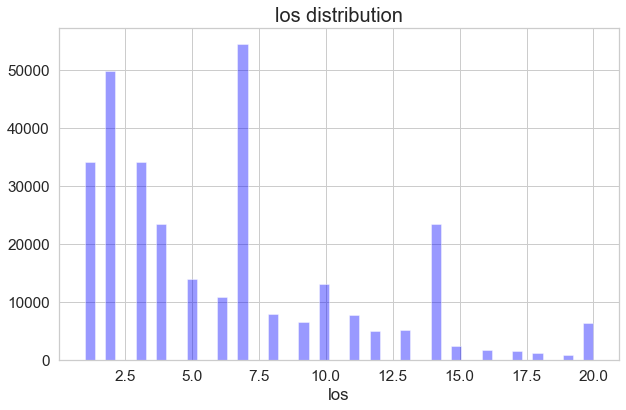

In [62]:
NBplot.distribution_plot(df2,['los'])

In [63]:
df2.los.value_counts()

7.0     54556
2.0     49922
1.0     34181
3.0     34176
4.0     23497
14.0    23484
5.0     13963
10.0    13096
6.0     11000
8.0     8021 
11.0    7839 
9.0     6674 
20.0    6352 
13.0    5152 
12.0    5136 
15.0    2474 
16.0    1770 
17.0    1681 
18.0    1290 
19.0    971  
Name: los, dtype: int64

Feature nbrooms:

In [64]:
df2 = df2.drop(['nbroom'], axis=1)

Feature nbguest: removing outliers when it's over 8 guests

In [65]:
df3 = df2[~(df2['nbguest'] >= 8)] 

In [66]:
df3.nbguest.value_counts()

4.0    107130
2.0    82381 
3.0    50789 
5.0    36067 
6.0    15708 
1.0    9793  
7.0    1875  
Name: nbguest, dtype: int64

Removing nbx_nuit_fid, Séjour Gratuit and Nb Nuits Payantes, because there will be no more free nights

In [67]:
df3 = df3.drop(['nb_nuit_fid', 'Séjour Gratuit', 'Nb Nuits Payantes'], axis=1)

For calculating revenue, I also remove vrai_date_resa

In [68]:
df3 = df3.drop(['vrai_date_resa'], axis=1)

Removing client_id_grp:

In [69]:
df3 = df3.drop(['client_id_grp'], axis=1)

Removing all columns revX:

In [70]:
df3 = df3.drop(['rev1', 'rev2', 'rev3', 'rev4', 'rev5'], axis=1)

Removing id columns:

In [71]:
df3 = df3.drop(['fid_id', 'date_fid'], axis=1)

In [72]:
df3.camping_fid.nunique()

100

In [73]:
df3 = df3.drop(['camping_fid'], axis=1)

In [74]:
df3 = df3.drop(['hebergement_camping_id'], axis=1)

In [75]:
df3 = df3.drop(['creation_date'], axis=1)

In [76]:
df3.select_dtypes(include=['float64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303743 entries, 0 to 305234
Data columns (total 6 columns):
resdate    303743 non-null float64
datein     303743 non-null float64
dateout    303743 non-null float64
los        303743 non-null float64
nbguest    303743 non-null float64
rev        303743 non-null float64
dtypes: float64(6)
memory usage: 16.2 MB


In [77]:
df3.head()

,idstay_to,resinternet,type_guest,resdate,camping_label,Région,type_hebergement,hebergement_label,datein,dateout,los,nbguest,rev,pays,fidelisation,segment,hebergement_camping_lbl,nb_stars
0,0,U,N,43040.0,TURISCAMPO,Portugal,LOCA,Locatif 3 ch. 4 *,43191.0,43220.0,20.0,1.0,740.00,BE,Y,DIRECT,LOCA - Not Defined,4_stars_or_premium
1,0,U,N,42675.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43072.0,43136.0,20.0,2.0,915.64,GB,Y,DIRECT,EMPL - Not Defined,3_stars_or_less
2,0,U,N,43040.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43101.0,43165.0,20.0,2.0,1138.66,GB,Y,DIRECT,Empla. Super Deluxe *** Luz,3_stars_or_less
3,0,U,N,43040.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43191.0,43252.0,20.0,2.0,901.00,DE,Y,DIRECT,EMPL - Not Defined,3_stars_or_less
4,0,U,N,42675.0,TURISCAMPO,Portugal,LOCA,Locatif 2 ch. PREMIUM,43074.0,43078.0,4.0,2.0,0.00,Other,N,DIRECT,LOCA - Not Defined,4_stars_or_premium


In [78]:
def epoch_day_to_time(srl_no):
    new_date = (datetime.datetime(1900,1,1,0,0) + (srl_no - 1).map(datetime.timedelta)).to_timestamp
    print(type(new_date))
    return new_date.datetime.strftime('%Y-%m-%d')

In [79]:
df3.shape

(303743, 18)

In [80]:
df3['date_in'] = pd.to_datetime(df3['datein'])

In [81]:
43136-43072.0

64.0

In [82]:
df3

,idstay_to,resinternet,type_guest,resdate,camping_label,Région,type_hebergement,hebergement_label,datein,dateout,los,nbguest,rev,pays,fidelisation,segment,hebergement_camping_lbl,nb_stars,date_in
0,0,U,N,43040.0,TURISCAMPO,Portugal,LOCA,Locatif 3 ch. 4 *,43191.0,43220.0,20.0,1.0,740.00,BE,Y,DIRECT,LOCA - Not Defined,4_stars_or_premium,1970-01-01 00:00:00.000043191
1,0,U,N,42675.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43072.0,43136.0,20.0,2.0,915.64,GB,Y,DIRECT,EMPL - Not Defined,3_stars_or_less,1970-01-01 00:00:00.000043072
2,0,U,N,43040.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43101.0,43165.0,20.0,2.0,1138.66,GB,Y,DIRECT,Empla. Super Deluxe *** Luz,3_stars_or_less,1970-01-01 00:00:00.000043101
3,0,U,N,43040.0,TURISCAMPO,Portugal,EMPL,Emplacement nu de 0 à 3 *,43191.0,43252.0,20.0,2.0,901.00,DE,Y,DIRECT,EMPL - Not Defined,3_stars_or_less,1970-01-01 00:00:00.000043191
4,0,U,N,42675.0,TURISCAMPO,Portugal,LOCA,Locatif 2 ch. PREMIUM,43074.0,43078.0,4.0,2.0,0.00,Other,N,DIRECT,LOCA - Not Defined,4_stars_or_premium,1970-01-01 00:00:00.000043074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305230,0,U,N,43402.0,TALOUCH,Sud Ouest,LOCA,Locatif 2 ch. 4 *,43402.0,43433.0,20.0,1.0,370.00,FR,N,DIRECT,Chalet Richelieu 4p 2ch ****,4_stars_or_premium,1970-01-01 00:00:00.000043402
305231,0,U,N,43378.0,TALOUCH,Sud Ouest,LOCA,Locatif 2 ch. de 0 à 3 *,43378.0,43409.0,20.0,1.0,370.00,FR,N,DIRECT,Chalet Porthos PRL 5pers 2ch***,3_stars_or_less,1970-01-01 00:00:00.000043378
305232,0,U,N,43382.0,TALOUCH,Sud Ouest,LOCA,Locatif 2 ch. de 0 à 3 *,43383.0,43414.0,20.0,1.0,370.00,FR,N,DIRECT,Chalet Athos 4/5pers. 2ch.**,3_stars_or_less,1970-01-01 00:00:00.000043383
305233,0,U,N,43382.0,TALOUCH,Sud Ouest,LOCA,Locatif 2 ch. de 0 à 3 *,43387.0,43403.0,16.0,1.0,672.00,FR,N,DIRECT,Chalet Athos 4/5pers. 2ch.**,3_stars_or_less,1970-01-01 00:00:00.000043387


In [83]:
def serial_date_to_string(srl_no):
    new_date = datetime.datetime(1900,1,1,0,0) + datetime.timedelta(srl_no - 1)
    date_parsed = parser.parse(new_date.strftime("%Y-%m-%d"))
    return date_parsed
  #  return pd.Series(date_parsed).dt.dayofyear[0]

In [84]:
serial_date_to_string(43000)

datetime.datetime(2017, 9, 23, 0, 0)

In [85]:
def epoch_day_to_time(srl_no):
    new_date = datetime.datetime(1900,1,1,0,0) + datetime.timedelta(srl_no - 1)
    return new_date.strftime("%Y-%m-%d")

In [86]:
epoch_day_to_time(43000)

'2017-09-23'

In [87]:
df['new_date_in'] = df['datein'].apply(lambda x: epoch_day_to_time(x))

In [88]:
df['new_date_out'] = df['dateout'].apply(lambda x: epoch_day_to_time(x))

In [89]:
df['new_date_in']

0         2018-04-02
1         2017-12-04
2         2018-01-02
3         2018-04-02
4         2017-12-06
             ...    
305230    2018-10-30
305231    2018-10-06
305232    2018-10-11
305233    2018-10-15
305234    2018-10-15
Name: new_date_in, Length: 305235, dtype: object

In [90]:
df['new_date_out']

0         2018-05-01
1         2018-02-06
2         2018-03-07
3         2018-06-02
4         2017-12-10
             ...    
305230    2018-11-30
305231    2018-11-06
305232    2018-11-11
305233    2018-10-31
305234    2018-10-31
Name: new_date_out, Length: 305235, dtype: object

In [91]:
df['los']

0         29.0
1         64.0
2         64.0
3         61.0
4         4.0 
         ...  
305230    31.0
305231    31.0
305232    31.0
305233    16.0
305234    16.0
Name: los, Length: 305235, dtype: float64

In [92]:
df_gavina = df[df['camping_label'] == 'GAVINA']

In [93]:
df_gavina

,idstay_to,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,region,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl,nb_stars,new_date_in,new_date_out
138949,0,U,N,43400.0,43040.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43182.0,43401.0,219.0,1.0,2.0,0.0,0.0,219.0,43035.0,3287372.0,3040.0,0.0,380.0,7.0,0.0,3427.0,1.091700e+11,ES,None,Y,43101.0,109.0,43035.0,DIRECT,Village,Village,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-03-24,2018-10-29
138950,0,O,N,43330.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43197.0,43210.0,13.0,1.0,5.0,0.0,0.0,13.0,43137.0,3331204.0,327.6,15.0,0.0,7.0,0.0,349.6,1.091700e+11,FR,None,Y,43101.0,109.0,43137.0,INTERNET,Village,Wvillage,2.0,Parcela 2p * Frente de mar 1Âª LÃ­nea,3_stars_or_less,2018-04-08,2018-04-21
138951,0,O,N,43379.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43276.0,43283.0,7.0,1.0,2.0,0.0,0.0,7.0,43137.0,3202963.0,265.0,15.0,0.0,7.0,0.0,287.0,1.091700e+11,BE,None,Y,43101.0,109.0,42962.0,Internet,Yelloh,Wyelloh,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-06-26,2018-07-03
138952,0,O,N,43295.0,43137.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43281.0,43295.0,14.0,1.0,5.0,0.0,0.0,14.0,43137.0,3331219.0,2240.0,0.0,0.0,7.0,0.0,2247.0,1.091700e+11,DE,None,Y,43101.0,109.0,43137.0,INTERNET,Village,Wvillage,11.0,Chalet Beach 4/5p 2Hab ***,3_stars_or_less,2018-07-01,2018-07-15
138953,0,O,N,43287.0,43138.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43281.0,43287.0,6.0,1.0,2.0,0.0,0.0,6.0,43138.0,3331661.0,930.0,0.0,0.0,6.0,0.0,936.0,1.091700e+11,CZ,None,Y,43101.0,109.0,43138.0,Internet,Yelloh,Wyelloh,9.0,Tienda Lodge Safari 6p2Hab+entresuelo***,3_stars_or_less,2018-07-01,2018-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141906,0,O,N,43330.0,43136.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43217.0,43219.0,2.0,1.0,3.0,0.0,0.0,2.0,43136.0,3330454.0,150.0,0.0,0.0,2.0,0.0,152.0,1.091700e+11,ES,None,Y,43101.0,109.0,43136.0,INTERNET,Village,Wvillage,10.0,Chalet Costa 4p 2Hab ***,3_stars_or_less,2018-04-28,2018-04-30
141907,0,O,N,43379.0,43136.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43297.0,43311.0,14.0,1.0,4.0,0.0,0.0,14.0,43136.0,3330652.0,1490.0,0.0,108.0,14.0,0.0,1612.0,1.091700e+11,NL,None,Y,43101.0,109.0,43136.0,INTERNET,Village,Wvillage,5.0,Tienda amueblada Junior 5p 2Hab **,3_stars_or_less,2018-07-17,2018-07-31
141908,0,U,N,43400.0,43136.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43182.0,43401.0,219.0,1.0,3.0,0.0,0.0,219.0,43136.0,3330711.0,3800.0,0.0,165.0,7.0,0.0,3972.0,0.000000e+00,ES,None,N,NaN,0.0,43136.0,DIRECT,Village,Village,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-03-24,2018-10-29
141909,0,O,N,43192.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43189.0,43192.0,3.0,1.0,2.0,0.0,0.0,3.0,43137.0,3035723.0,66.0,0.0,0.0,3.0,0.0,69.0,1.091700e+11,ES,8005,Y,43101.0,109.0,42662.0,INTERNET,Village,Wvillage,999998.0,EMPL - Not Defined,3_stars_or_less,2018-03-31,2018-04-03


In [94]:
df_gavina

,idstay_to,resinternet,type_guest,extract_date,resdate,camping_code,camping_label,Région,type_hebergement,hebergement,hebergement_label,datein,dateout,los,nbroom,nbguest,nb_nuit_fid,Séjour Gratuit,Nb Nuits Payantes,vrai_date_resa,client_id_grp,rev1,rev2,rev3,rev4,rev5,rev,fid_id,pays,region,fidelisation,date_fid,camping_fid,creation_date,segment,scode1,scode2,hebergement_camping_id,hebergement_camping_lbl,nb_stars,new_date_in,new_date_out
138949,0,U,N,43400.0,43040.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43182.0,43401.0,219.0,1.0,2.0,0.0,0.0,219.0,43035.0,3287372.0,3040.0,0.0,380.0,7.0,0.0,3427.0,1.091700e+11,ES,None,Y,43101.0,109.0,43035.0,DIRECT,Village,Village,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-03-24,2018-10-29
138950,0,O,N,43330.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43197.0,43210.0,13.0,1.0,5.0,0.0,0.0,13.0,43137.0,3331204.0,327.6,15.0,0.0,7.0,0.0,349.6,1.091700e+11,FR,None,Y,43101.0,109.0,43137.0,INTERNET,Village,Wvillage,2.0,Parcela 2p * Frente de mar 1Âª LÃ­nea,3_stars_or_less,2018-04-08,2018-04-21
138951,0,O,N,43379.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43276.0,43283.0,7.0,1.0,2.0,0.0,0.0,7.0,43137.0,3202963.0,265.0,15.0,0.0,7.0,0.0,287.0,1.091700e+11,BE,None,Y,43101.0,109.0,42962.0,Internet,Yelloh,Wyelloh,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-06-26,2018-07-03
138952,0,O,N,43295.0,43137.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43281.0,43295.0,14.0,1.0,5.0,0.0,0.0,14.0,43137.0,3331219.0,2240.0,0.0,0.0,7.0,0.0,2247.0,1.091700e+11,DE,None,Y,43101.0,109.0,43137.0,INTERNET,Village,Wvillage,11.0,Chalet Beach 4/5p 2Hab ***,3_stars_or_less,2018-07-01,2018-07-15
138953,0,O,N,43287.0,43138.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43281.0,43287.0,6.0,1.0,2.0,0.0,0.0,6.0,43138.0,3331661.0,930.0,0.0,0.0,6.0,0.0,936.0,1.091700e+11,CZ,None,Y,43101.0,109.0,43138.0,Internet,Yelloh,Wyelloh,9.0,Tienda Lodge Safari 6p2Hab+entresuelo***,3_stars_or_less,2018-07-01,2018-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141906,0,O,N,43330.0,43136.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43217.0,43219.0,2.0,1.0,3.0,0.0,0.0,2.0,43136.0,3330454.0,150.0,0.0,0.0,2.0,0.0,152.0,1.091700e+11,ES,None,Y,43101.0,109.0,43136.0,INTERNET,Village,Wvillage,10.0,Chalet Costa 4p 2Hab ***,3_stars_or_less,2018-04-28,2018-04-30
141907,0,O,N,43379.0,43136.0,109.0,GAVINA,Espagne,LOCA,5.0,Locatif 2 ch. de 0 à 3 *,43297.0,43311.0,14.0,1.0,4.0,0.0,0.0,14.0,43136.0,3330652.0,1490.0,0.0,108.0,14.0,0.0,1612.0,1.091700e+11,NL,None,Y,43101.0,109.0,43136.0,INTERNET,Village,Wvillage,5.0,Tienda amueblada Junior 5p 2Hab **,3_stars_or_less,2018-07-17,2018-07-31
141908,0,U,N,43400.0,43136.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43182.0,43401.0,219.0,1.0,3.0,0.0,0.0,219.0,43136.0,3330711.0,3800.0,0.0,165.0,7.0,0.0,3972.0,0.000000e+00,ES,None,N,NaN,0.0,43136.0,DIRECT,Village,Village,1.0,Parcela 2p * 3Âª LÃ­nea,3_stars_or_less,2018-03-24,2018-10-29
141909,0,O,N,43192.0,43137.0,109.0,GAVINA,Espagne,EMPL,2.0,Emplacement nu de 0 à 3 *,43189.0,43192.0,3.0,1.0,2.0,0.0,0.0,3.0,43137.0,3035723.0,66.0,0.0,0.0,3.0,0.0,69.0,1.091700e+11,ES,8005,Y,43101.0,109.0,42662.0,INTERNET,Village,Wvillage,999998.0,EMPL - Not Defined,3_stars_or_less,2018-03-31,2018-04-03


In [95]:
from collections import defaultdict
season = pd.date_range(start=min(df['new_date_in']),end=max(df['new_date_out']))
dict_dates = defaultdict(int)
for date in season:
    dict_dates[date] = 0

In [96]:
df_gavina['los']

138949    219.0
138950    13.0 
138951    7.0  
138952    14.0 
138953    6.0  
         ...   
141906    2.0  
141907    14.0 
141908    219.0
141909    3.0  
141910    13.0 
Name: los, Length: 2962, dtype: float64

In [97]:
pd.Timestamp(df['new_date_in'][138949])

Timestamp('2018-03-24 00:00:00')

In [98]:
for index in df_gavina.index:
    for j in range(int(df['los'][index])):
        dict_dates[pd.Timestamp(df_gavina['new_date_in'][index]) + pd.DateOffset(days=j)] += 1 

(array([736785., 736815., 736846., 736876., 736907., 736938., 736968.,
        736999.]), <a list of 8 Text xticklabel objects>)

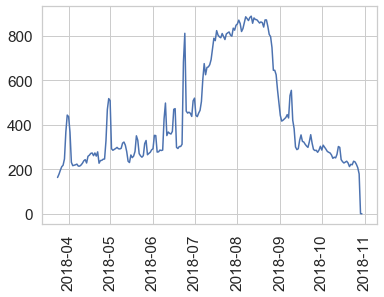

In [107]:
date = list(dict_dates.keys())
n_cust = list(dict_dates.values())
df_occ = pd.DataFrame(date)
df_occ['n_cust'] = n_cust
df_occ = df_occ.set_index(0)
plt.plot(df_occ['n_cust'])
plt.xticks(rotation=90)

In [108]:
import datetime

In [109]:
NUMBER_NIGHTS = 73960

In [110]:
list(dict_dates.keys())[-1] - list(dict_dates.keys())[0] 

Timedelta('220 days 00:00:00')

In [111]:
CAPACITY_DAY = NUMBER_NIGHTS/220

In [112]:
int(CAPACITY_DAY)

336

In [113]:


from collections import defaultdict
season = pd.date_range(start=min(df['new_date_in']),end=max(df['new_date_out']))
dict_dates2 = defaultdict(int)
for date in season:
    dict_dates2[date] = 0

season = pd.date_range(start=min(df_gavina['new_date_in']),end=max(df_gavina['new_date_out']))
dict_dates = defaultdict(int)
for date in season:
    dict_dates[date] = 0
    
for index in df_gavina.index:
    for j in range(int(df_gavina['los'][index])):
        dict_dates2[pd.Timestamp(df_gavina['new_date_in'][index]) + pd.DateOffset(days=j)] += df_gavina['nbguest'][index]
        


In [114]:
dict_dates2

defaultdict(int,
            {Timestamp('2017-11-02 00:00:00', freq='D'): 0,
             Timestamp('2017-11-03 00:00:00', freq='D'): 0,
             Timestamp('2017-11-04 00:00:00', freq='D'): 0,
             Timestamp('2017-11-05 00:00:00', freq='D'): 0,
             Timestamp('2017-11-06 00:00:00', freq='D'): 0,
             Timestamp('2017-11-07 00:00:00', freq='D'): 0,
             Timestamp('2017-11-08 00:00:00', freq='D'): 0,
             Timestamp('2017-11-09 00:00:00', freq='D'): 0,
             Timestamp('2017-11-10 00:00:00', freq='D'): 0,
             Timestamp('2017-11-11 00:00:00', freq='D'): 0,
             Timestamp('2017-11-12 00:00:00', freq='D'): 0,
             Timestamp('2017-11-13 00:00:00', freq='D'): 0,
             Timestamp('2017-11-14 00:00:00', freq='D'): 0,
             Timestamp('2017-11-15 00:00:00', freq='D'): 0,
             Timestamp('2017-11-16 00:00:00', freq='D'): 0,
             Timestamp('2017-11-17 00:00:00', freq='D'): 0,
             Timestamp(

In [115]:
list(dict_dates2.values())[142]

163.0

In [116]:
list(dict_dates2.values())[361]

1.0

In [117]:
list(dict_dates2.keys())[142] - list(dict_dates2.keys())[361]

Timedelta('-219 days +00:00:00')